In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
titanic_df = pd.read_csv('titanic_dataset.csv')

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_df.shape

(891, 12)

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Out of 891 data points, Cabin has 687 blank so we will need to drop this column 

In [8]:
titanic_df.drop(columns = 'Cabin', axis = 1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

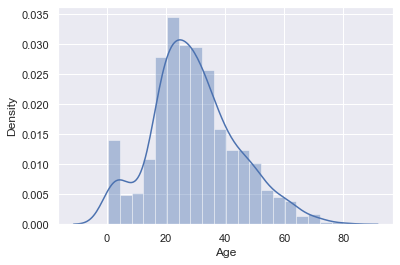

In [9]:
sns. set()
sns.distplot(titanic_df['Age'])

Replacing Age with it's mean since age is almost Normally distributed 

In [10]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)

In [16]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Filling Embraked with 'S'since it's most occuring 

In [17]:
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace = True)

In [18]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data analysis with some visualisation 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

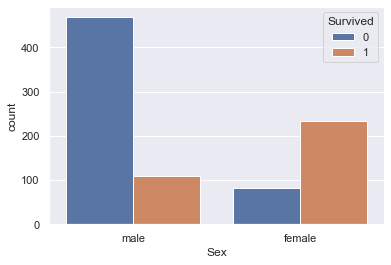

In [21]:
sns.set()
sns.countplot(titanic_df['Sex'], hue = titanic_df['Survived'])
#women surviving ratio > male surviving ratio

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

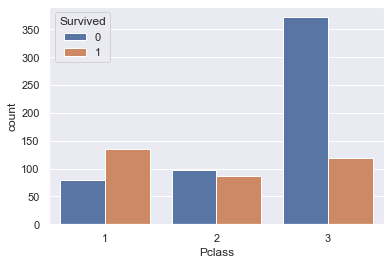

In [23]:
sns.set()
sns.countplot(titanic_df['Pclass'], hue = titanic_df['Survived'])
#first class surviving ratio > #lower classes

Label Encoding

In [24]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [30]:
titanic_df.replace({'Sex':{'male' : 1,'female' :0}, 'Embarked': {'Q': 0, 'S': 1, 'C': 2}}, inplace = True)

In [31]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,1


In [35]:
X = titanic_df.drop(columns = {'PassengerId', 'Name', 'Ticket', 'Survived'}, axis = 1)
Y = titanic_df['Survived']

In [36]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    1  22.000000      1      0   7.2500         1
1         1    0  38.000000      1      0  71.2833         2
2         3    0  26.000000      0      0   7.9250         1
3         1    0  35.000000      1      0  53.1000         1
4         3    1  35.000000      0      0   8.0500         1
..      ...  ...        ...    ...    ...      ...       ...
886       2    1  27.000000      0      0  13.0000         1
887       1    0  19.000000      0      0  30.0000         1
888       3    0  29.699118      1      2  23.4500         1
889       1    1  26.000000      0      0  30.0000         2
890       3    1  32.000000      0      0   7.7500         0

[891 rows x 7 columns]


In [37]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,stratify = Y, random_state = 2)

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (668, 7) (223, 7)


In [44]:
model = LogisticRegression(solver='lbfgs', max_iter=3000)

In [45]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=3000)

In [46]:
X_train_predict = model.predict(X_train)
X_Train_accuracy = accuracy_score(X_train_predict, Y_train)

In [47]:
print('Accuracy of training data is :', X_Train_accuracy)

Accuracy of training data is : 0.7994011976047904


In [48]:
X_test_predict = model.predict(X_test)
X_Test_accuracy = accuracy_score(X_test_predict, Y_test)

In [49]:
print('Accuracy of testing data is :', X_Test_accuracy)

Accuracy of testing data is : 0.7847533632286996
